In [1]:
import scanpy as sc
import scvelo as scv
import numpy as np
import seaborn as sns
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

SEED = 2024
np.random.seed(SEED)

In [2]:
adata = sc.read_h5ad("/media/liyaru/LYR/Diff_change/8_dynamo_Data/scNT_HSC_scvelo_process.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 1947 × 2000
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts'
    var: 'gene_name_mapping', 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR'
    obsm: 'X_pca', 'X_umap', 'scNT_velocity_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_t', 'M_tn', 'M_tt', 'M_u', 'M_us', 'M_uu',

In [3]:
scv.tl.recover_dynamics(adata, n_jobs=10,var_names= "all")
scv.tl.velocity(adata, mode='dynamical')

recovering dynamics (using 10/20 cores)


  0%|          | 0/2000 [00:00<?, ?gene/s]

 TMEM67
not recoverable due to insufficient samples.
    finished (0:00:29) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [4]:
scv.tl.velocity_graph(adata,vkey="velocity",n_jobs=10,basis= "umap")

        Consider computing the graph in an unbiased manner 
        on full expression space by not specifying basis.

computing velocity graph (using 10/20 cores)


  0%|          | 0/1947 [00:00<?, ?cells/s]

    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file Figure/stream/scvelo_dynamic.pdf


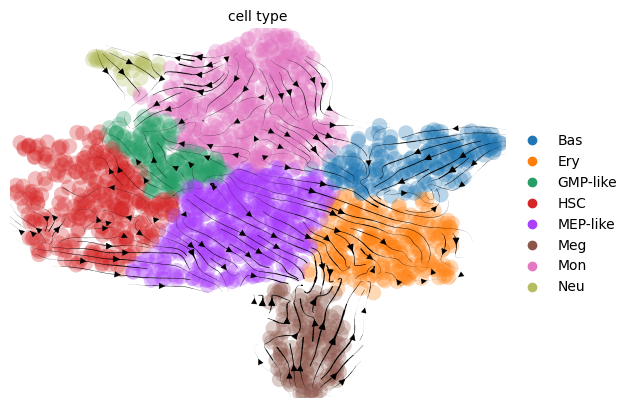

In [5]:
scv.pl.velocity_embedding_stream(adata,basis= "umap",color="cell_type",
                                 palette = sc.pl.palettes.default_20,
                                 legend_loc = 'right margin',
                                 save="Figure/stream/" + "scvelo_dynamic.pdf" )

In [6]:
adata.write_h5ad("adata/scvelo_dynamic.h5ad")